In [1]:
import numpy as np
import tensorflow as tf
import gym
from ppo import PPO
from recorder import Recorder
from logRewards import DataLogger
import warnings
warnings.filterwarnings('ignore') #ignora warnings
seed=42

2025-01-06 10:32:11.847550: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736155931.978215    4056 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736155932.013338    4056 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-06 10:32:12.326451: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:

tf.random.set_seed(seed)
np.random.seed(seed)


# Configurazione ed esecuzione
#Lista di giochi a disposizione di Procgen:
""" 
    bigfish, bossfight, caveflyer, chaser, climber
    coinrun, dodgeball, fruitbot, heist, jumper
    leaper, maze, miner, ninja, plumber, starpilot
"""
seed=42
gameName="starpilot" 
env = gym.make('procgen:procgen-'+gameName+'-v0',distribution_mode='easy',start_level=seed,rand_seed=seed, num_levels=100, use_backgrounds=False)
recorder=Recorder(gameName)
dataLogger=DataLogger(gameName)
ppo=PPO(env,weightsPath=None,recorder=recorder,dataLogger=dataLogger,gameName=gameName)

I0000 00:00:1736155938.989714    4056 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2735 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5


ACTOR CRITIC LOADED


Model: "actor_ppo"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 128)            │        44,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ actor_ppo_dense4 (Dense)        │ (1, 15)                │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,095 (539.44 KB)

 Trainable params: 46,031 (179.81 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 92,064 (359.63 KB)

Model: "critic_ppo"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)       │ (None, 128)            │        44,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ critic_ppo_dense4 (Dense)       │ (1, 1)                 │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 132,677 (518.27 KB)

 Trainable params: 44,225 (172.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 88,452 (345.52 KB)

In [ ]:


for epoch in range(ppo.nEpochs):                                            # Main training loop for n epochs

        obs ,actions ,logp , returns, advs = ppo.rollout()                                  # Get Rollout and infos
        #Check if batches contains nan or inf values
        try:
                tf.debugging.check_numerics(tf.cast(obs, tf.float32), "obs_batch has nan or inf values")
        except:
                print("OBS BATCH HAS NAN OR INF VALUES")
                print(obs)
                break
        try:
                tf.debugging.check_numerics(tf.cast(actions, tf.float32), "actions_batch has nan or inf values")
        except:
                print("ACTIONS BATCH HAS NAN OR INF VALUES")
                print(actions)
                break
        
        try:
                tf.debugging.check_numerics(logp, "logp_t_batch has nan or inf values")
        except:
                print("logp BATCH HAS NAN OR INF VALUES")
                print(logp)
                break
        try:
                tf.debugging.check_numerics(advs, "advs_batch has nan or inf values")
        except:
                print("ADVS BATCH HAS NAN OR INF VALUES")
                print(advs)
                break
        try:
                tf.debugging.check_numerics(returns, "returns_batch has nan or inf values")
        except:
                print("returns BATCH HAS NAN OR INF VALUES")
                print(returns)
                break
        
        
        print(f"Epoch: {epoch} | Rollout completed")                     # Print loss for each epoch
        print(obs.shape,actions.shape,logp.shape,returns.shape,advs.shape)
        total_loss = ppo.train(obs,actions,advs,returns,logp)                                         # Push rollout in ppo and update policy accordingly
        print(f"Epoch: {epoch} | Loss: {total_loss}")                     # Print loss for each epoch
        ppo.save_model(epoch=epoch)
        ppo.update_hyperparams(epoch=epoch)
        if epoch % 5 ==0:
                ppo.evaluate_model()


I0000 00:00:1736119224.535674    4029 cuda_dnn.cc:529] Loaded cuDNN version 90300


Reward per episode:  10.0  Episode length:  706
Reward per episode:  10.0  Episode length:  1000
Epoch: 0 | Rollout completed
(2048, 64, 64, 3) (2048,) (2048,) (2048,) (2048,)
Total loss:  -0.7974701  Policy loss:  -0.79774505  Value loss:  0.00027494234  Entropy loss:  -0.8110931
Total loss:  -0.7950101  Policy loss:  -0.7953012  Value loss:  0.00029108327  Entropy loss:  -0.8111481
Total loss:  -0.7964055  Policy loss:  -0.7967957  Value loss:  0.00039022433  Entropy loss:  -0.81146646
Total loss:  -0.7145977  Policy loss:  -0.8376045  Value loss:  0.12300685  Entropy loss:  -0.81144965
Total loss:  -0.7949219  Policy loss:  -0.7953128  Value loss:  0.0003909514  Entropy loss:  -0.8113925
Total loss:  -0.7974592  Policy loss:  -0.7978819  Value loss:  0.0004227117  Entropy loss:  -0.8112386
Total loss:  -0.7968378  Policy loss:  -0.7976995  Value loss:  0.0008616829  Entropy loss:  -0.8111239
Total loss:  -0.7981622  Policy loss:  -0.79878265  Value loss:  0.00062040956  Entropy loss

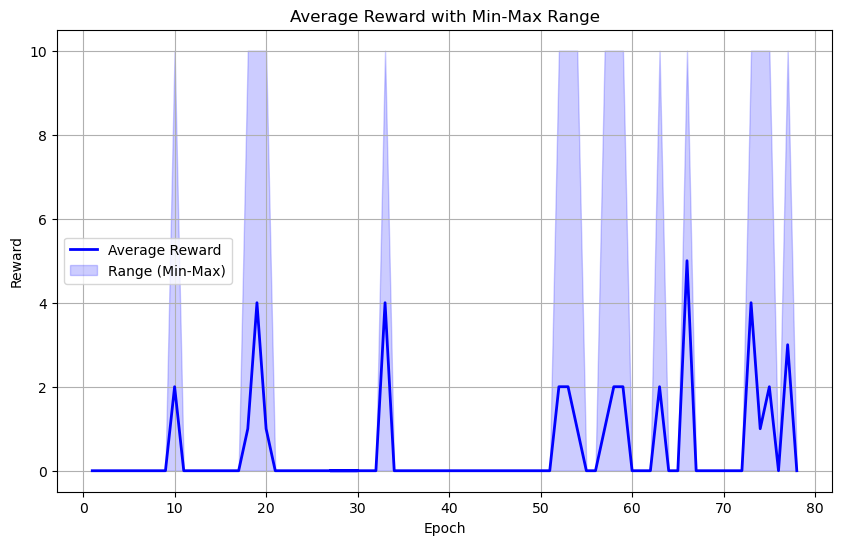

In [3]:
#Show graphs

dataLogger.showGraphAverageReward()

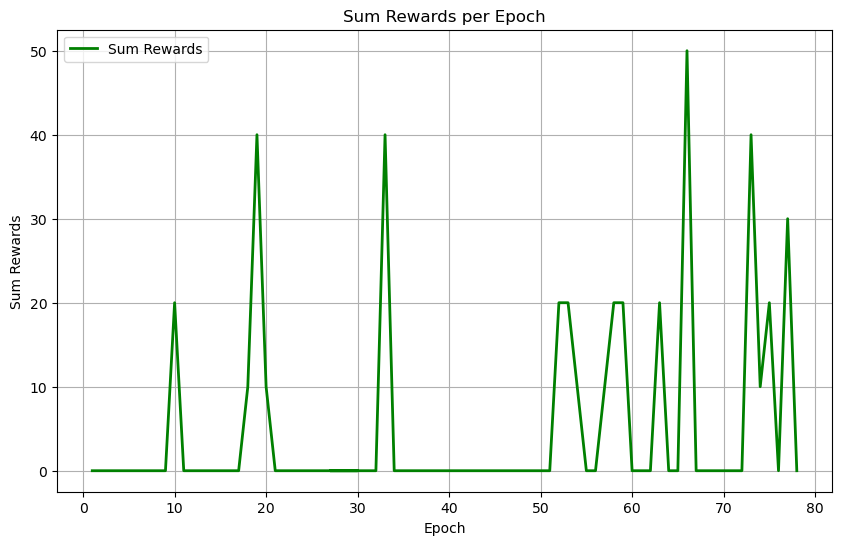

In [4]:

dataLogger.showGraphCumulativeReward()